# Linear Regression

- load dataset
- split dataset into train (80%) test (20%)
- train model
- test model

In [1]:
list.files()

[1] "Boston.csv"                              
[2] "Linear Regression with Boston Data.ipynb"

### Load dataset

In [2]:
df <- read.csv("Boston.csv")

In [3]:
head(df) # print first 6 rows

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
cat(paste0("Dataset has ", dim(df)[1], " rows."))
cat(paste0("\nDataset has ", dim(df)[2], " columns."))

Dataset has 506 rows.
Dataset has 14 columns.

In [5]:
if(mean(complete.cases(df)) == 1){
    cat("Dataset is complete")
} else {
    cat("Dataset has missing values")
}

Dataset is complete

### Summary Statistics

In [6]:
summary(df)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

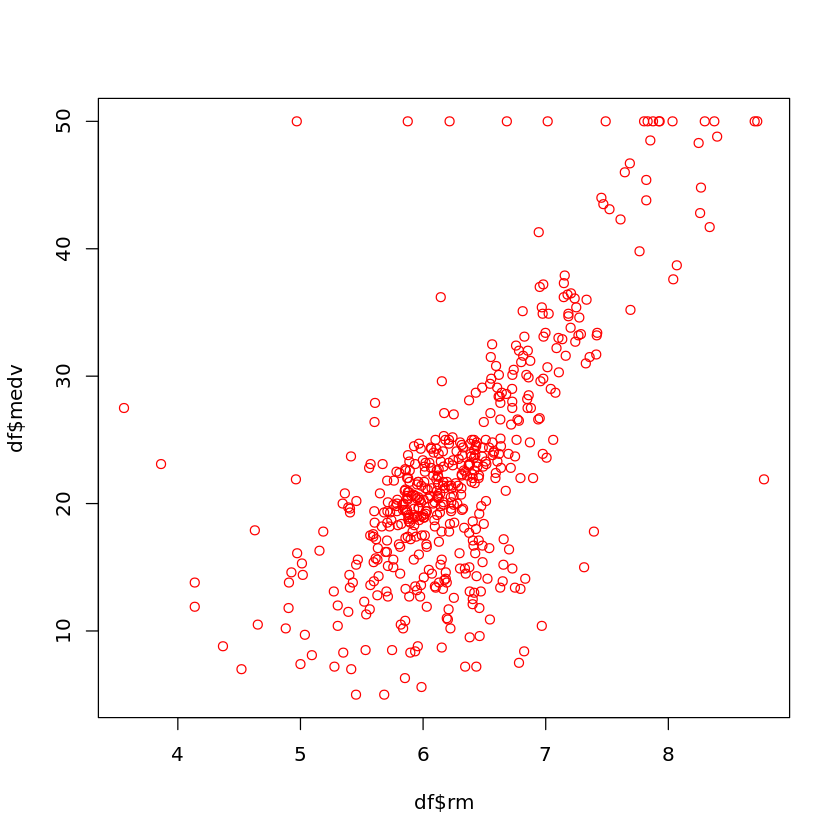

In [7]:
plot(df$rm, df$medv, col="red")

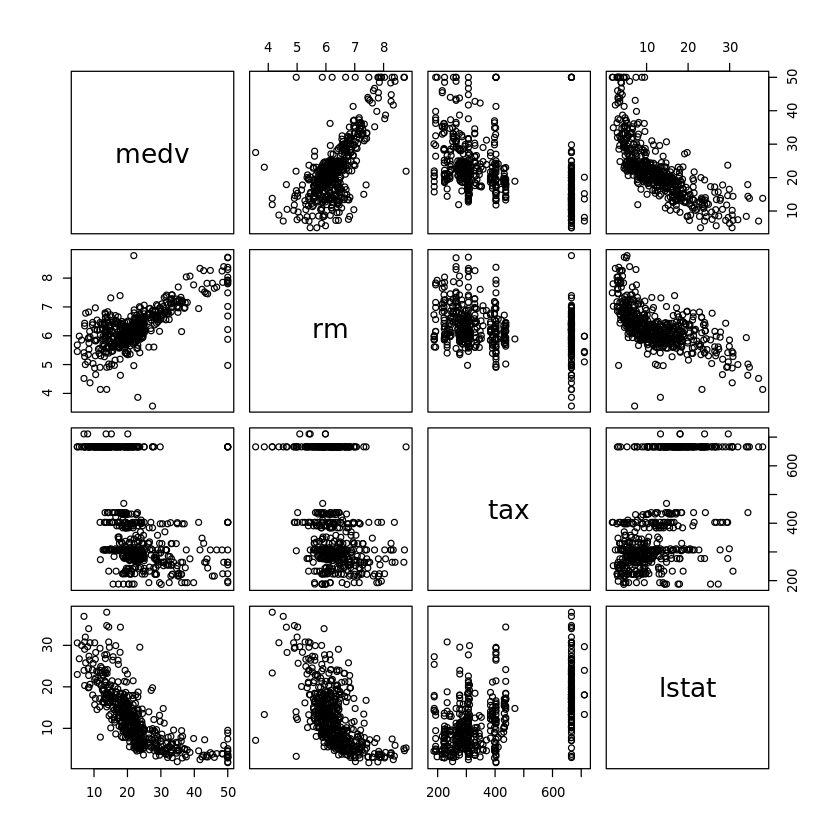

In [8]:
plot(df[, c("medv", "rm", "tax", "lstat")]) # need to adjust the fig size

### Split Data

แบ่งข้อมูลออกเป็น train (80%) และ test (20%)

machine learning rule: สร้างโมเดลด้วย train ทดสอบโมเดลด้วย test (หรืออีกชื่อคือ validate)

In [9]:
set.seed(99)
n <- nrow(df)
id <- sample(1:n, size = n*0.8, replace = FALSE)
train_df <- df[id, ]
test_df <- df[-id, ]

In [10]:
# quick sanity check
dim(train_df)
dim(test_df)

[1] 404  14

[1] 102  14

### Train Model

R ใช้ฟังชั่น lm() ในการเทรน linear regression

argument แรกของฟังชั่นคือ formula: medv ~ . เราสั่งให้ R ใช้ตัวแปรทั้งหมดใน dataframe ทำนาย medv

In [11]:
lm_model <- lm(medv ~ ., data = train_df)
print(lm_model)


Call:
lm(formula = medv ~ ., data = train_df)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  38.244000    -0.120009     0.055663     0.002338     2.850636   -17.233528  
         rm          age          dis          rad          tax      ptratio  
   3.501261     0.006681    -1.510574     0.331114    -0.011767    -0.927444  
      black        lstat  
   0.008853    -0.594635  



### Predict and Evaluate

ทำนาย test data ด้วยฟังชั่น predict() และคำนวณ mae ด้วยสูตรด้านล่าง

In [12]:
p <- predict(lm_model, newdata = test_df)
print(p[1:10])

        2         7        11        12        19        25        43        49 
25.065157 23.022033 18.484817 21.622602 16.350415 15.659708 25.113569  8.025409 
       57        61 
25.634466 18.166264 


In [13]:
mae <- mean(abs(p - test_df$medv))
cat(paste0("Test MAE: ", round(mae, 4)))

Test MAE: 3.4408